In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot  as plt
import numpy as np
print('import successfull')

import successfull


In [6]:
torch.cuda.is_available()

True

In [7]:
torch.cuda.current_device()

0

In [8]:
torch.device(0)

device(type='cuda', index=0)

In [63]:
torch.cuda.get_device_name()

'GeForce GTX 1650'

In [64]:
# device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [65]:
# Hyper-parameters 
num_epochs = 10
batch_size = 4
learning_rate = 0.001

In [66]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))# Sequence of mean / std for each channel
])
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [67]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset= torchvision.datasets.CIFAR10(root='./data',
                                           train=True,
                                           download=True,
                                           transform = transform)

Files already downloaded and verified


In [68]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [69]:
# defining train and tets loader 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [70]:
dataset = iter(train_dataset)
next(dataset)

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [71]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [72]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [73]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

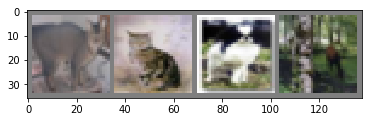

In [74]:
# show images
imshow(torchvision.utils.make_grid(images))

In [75]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)#input channel,ouputchanel, kenel size
        self.pool = nn.MaxPool2d(2, 2)# kenel size , stride
        self.conv2 = nn.Conv2d(6, 16, 5)# intput chanel, output , kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)# int feature , out features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

In [76]:
model

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### input size for fc1

In [78]:
conv1 = nn.Conv2d(3,6,5)
pool = nn.MaxPool2d(2,2)
conv2= nn.Conv2d(6,16,5)
print(images.shape)# batch size is 4, 3 channel , 32*32 images

torch.Size([4, 3, 32, 32])


In [79]:
x= conv1(images)
print(x.shape)  # (W-F+2P)/S+1 , w = width of input ,F= fiter_size,P= padding, S= stride

torch.Size([4, 6, 28, 28])


In [80]:
x= pool(x)
print(x.shape)

torch.Size([4, 6, 14, 14])


In [81]:
x= conv2(x)
print(x.shape)

torch.Size([4, 16, 10, 10])


In [82]:
x= pool(x)
print(x.shape)

torch.Size([4, 16, 5, 5])


In [83]:
## defining loss function and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(criterion)
print(optimizer)

CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [84]:
n_total_steps = len(train_loader)
print(n_total_steps)

12500


In [85]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [32, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 4000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [4000/12500], Loss: 2.3102
Epoch [1/10], Step [8000/12500], Loss: 2.2907
Epoch [1/10], Step [12000/12500], Loss: 2.2162
Epoch [2/10], Step [4000/12500], Loss: 1.8429
Epoch [2/10], Step [8000/12500], Loss: 1.5795
Epoch [2/10], Step [12000/12500], Loss: 1.0994
Epoch [3/10], Step [4000/12500], Loss: 1.7584
Epoch [3/10], Step [8000/12500], Loss: 1.6486
Epoch [3/10], Step [12000/12500], Loss: 1.7896
Epoch [4/10], Step [4000/12500], Loss: 1.8070
Epoch [4/10], Step [8000/12500], Loss: 1.2874
Epoch [4/10], Step [12000/12500], Loss: 1.4012
Epoch [5/10], Step [4000/12500], Loss: 1.9428
Epoch [5/10], Step [8000/12500], Loss: 1.2945
Epoch [5/10], Step [12000/12500], Loss: 1.2395
Epoch [6/10], Step [4000/12500], Loss: 1.5558
Epoch [6/10], Step [8000/12500], Loss: 1.4667
Epoch [6/10], Step [12000/12500], Loss: 1.7436
Epoch [7/10], Step [4000/12500], Loss: 1.5475
Epoch [7/10], Step [8000/12500], Loss: 1.3487
Epoch [7/10], Step [12000/12500], Loss: 0.8079
Epoch [8/10], Step [4000/12

In [86]:
print('Trainning finished')

Trainning finished


In [87]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [88]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 56.7 %
